In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


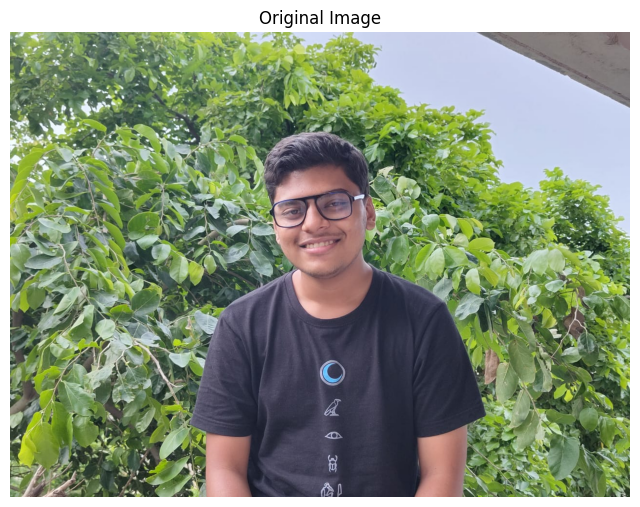

In [4]:
# Load the image using OpenCV
image_path = r'E:\Samyak\WhatsApp Image 2023-07-07 at 19.03.05.jpg'  # Path to the uploaded image
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV format) to RGB (for displaying in Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()


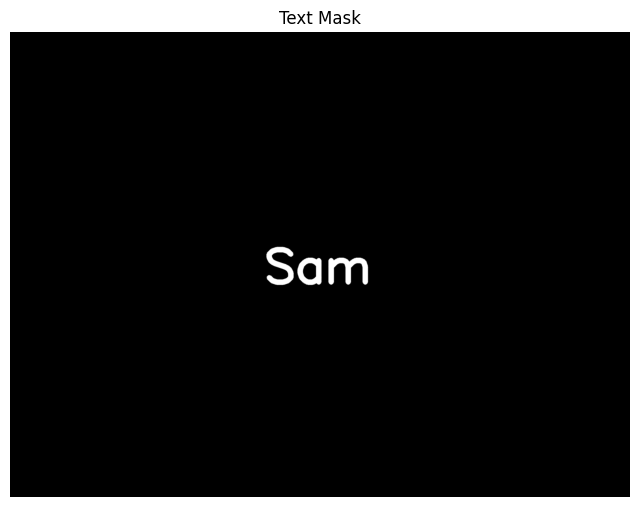

In [5]:
# Define the text and font properties
text = "Sam"  # Change this to your desired text
font = cv2.FONT_HERSHEY_SIMPLEX  # Use a simple font
font_scale = min(image.shape[1], image.shape[0]) / 300  # Scale dynamically with image size
font_thickness = int(font_scale * 3)  # Adjust thickness dynamically

# Calculate the size and position of the text
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)
text_x = (image.shape[1] - text_width) // 2  # Center horizontally
text_y = (image.shape[0] + text_height) // 2  # Center vertically

# Create a blank mask with the same dimensions as the image
mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Draw the text on the mask in white color
cv2.putText(mask, text, (text_x, text_y), font, font_scale, (255), font_thickness, lineType=cv2.LINE_AA)

# Display the mask
plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap="gray")
plt.axis('off')
plt.title("Text Mask")
plt.show()


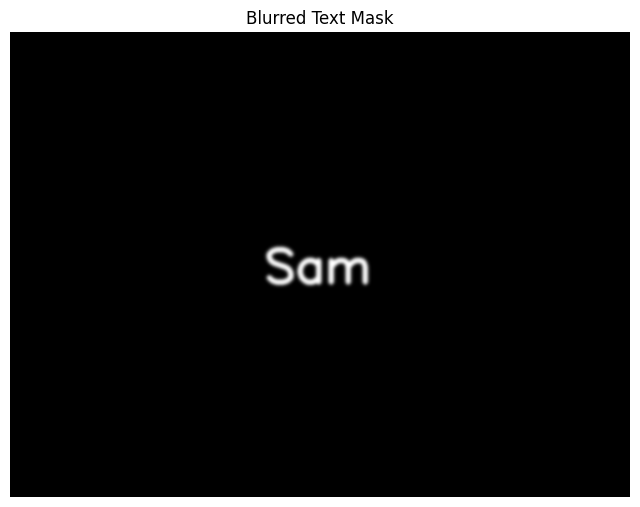

In [6]:
# Apply Gaussian blur to the mask
blurred_mask = cv2.GaussianBlur(mask, (21, 21), 0)
# Display the blurred mask
plt.figure(figsize=(8, 8))
plt.imshow(blurred_mask, cmap="gray")
plt.axis('off')
plt.title("Blurred Text Mask")
plt.show()


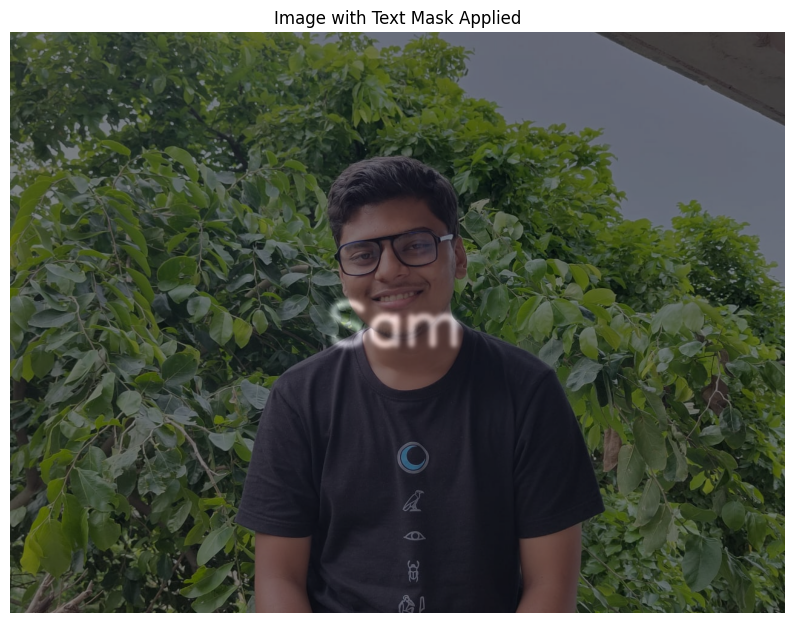

In [7]:
# Convert the blurred mask to 3 channels to match the image dimensions
mask_3channel = cv2.merge([blurred_mask, blurred_mask, blurred_mask])

# Blend the mask with the original image
alpha = 0.5  # Transparency factor
text_overlay_image = cv2.addWeighted(image, 1 - alpha, mask_3channel, alpha, 0)

# Display the final image
text_overlay_image_rgb = cv2.cvtColor(text_overlay_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(text_overlay_image_rgb)
plt.axis('off')
plt.title("Image with Text Mask Applied")
plt.show()
